In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import pandas as pd
import datetime as dt

tunit_JST = 'days since 1968-05-23 09:00:00 GMT'

obsfile = '/Users/teruhisa/Dropbox/Data/ob500_obs_2012_obweb-2.nc'
modfile = '/Users/teruhisa/Dropbox/Data/OB500_fennelP/NL02/ob500_mod.nc'

mod = netCDF4.Dataset(modfile, 'r')
obs = netCDF4.Dataset(obsfile, 'r')

In [18]:
varname = 'temp'
varid = 6

time = obs.variables['obs_time'][:]
time = netCDF4.num2date(time, tunit_JST)
index = np.where(time < dt.datetime(2012,1,5,0))
index

(array([    0,     1,     2, ..., 40730, 40731, 40732]),)

In [19]:
x = mod.variables['NLmodel_value'][index]
y = obs.variables['obs_value'][index]
type = obs.variables['obs_type'][index]
depth = obs.variables['obs_depth'][index]
station = obs.variables['obs_station'][index]

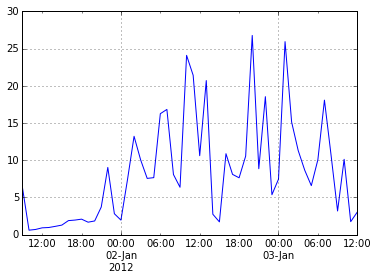

In [20]:
data = {'station': station, 'depth': depth, 'type': type, 'x': x, 'y': y}
df = pd.DataFrame(data, index=time[index])
df = df[df.x<999.9]
df = df[df.x>1.0]
df = df[df.type==10]
#df = df[df.station==1]
df['error'] = df.y - df.x
df['SE'] = df.error ** 2
df = df.resample('H', how='mean')
df['RMSE'] = np.sqrt(df.SE)
df.RMSE.plot()
#df